<h1>Generate Data</h1>
<p>Create data from a straight line and then add some Gaussian noise</p>

In [1]:
#Create some fake input data
import numpy as np

NUM_POINTS = 30

# Evenly spaced x positions
x = np.linspace(0,10, NUM_POINTS).reshape((NUM_POINTS, 1))
print 'x =', x

# Gausian/normal noise
noise = np.random.randn(NUM_POINTS).reshape((NUM_POINTS, 1))

# y = 3x + noise
y = 3.0*x + noise

print
print 'y =', y

x = [[  0.        ]
 [  0.34482759]
 [  0.68965517]
 [  1.03448276]
 [  1.37931034]
 [  1.72413793]
 [  2.06896552]
 [  2.4137931 ]
 [  2.75862069]
 [  3.10344828]
 [  3.44827586]
 [  3.79310345]
 [  4.13793103]
 [  4.48275862]
 [  4.82758621]
 [  5.17241379]
 [  5.51724138]
 [  5.86206897]
 [  6.20689655]
 [  6.55172414]
 [  6.89655172]
 [  7.24137931]
 [  7.5862069 ]
 [  7.93103448]
 [  8.27586207]
 [  8.62068966]
 [  8.96551724]
 [  9.31034483]
 [  9.65517241]
 [ 10.        ]]

y = [[ -1.41165491]
 [  2.03683977]
 [  1.6339652 ]
 [  0.92386601]
 [  4.54384325]
 [  7.35330816]
 [  6.6435984 ]
 [  6.91374239]
 [  7.95978485]
 [  8.10990404]
 [ 12.45890849]
 [ 10.78363815]
 [ 11.85085519]
 [ 12.62515777]
 [ 13.69431441]
 [ 15.32851148]
 [ 16.09056412]
 [ 17.93024135]
 [ 19.68495095]
 [ 20.37410902]
 [ 21.06064328]
 [ 21.96022353]
 [ 22.12676947]
 [ 24.21644416]
 [ 25.25856226]
 [ 24.97968   ]
 [ 26.87671611]
 [ 26.85781945]
 [ 28.77307048]
 [ 28.50893514]]


(array([-0.5]), array([ 10.5]))

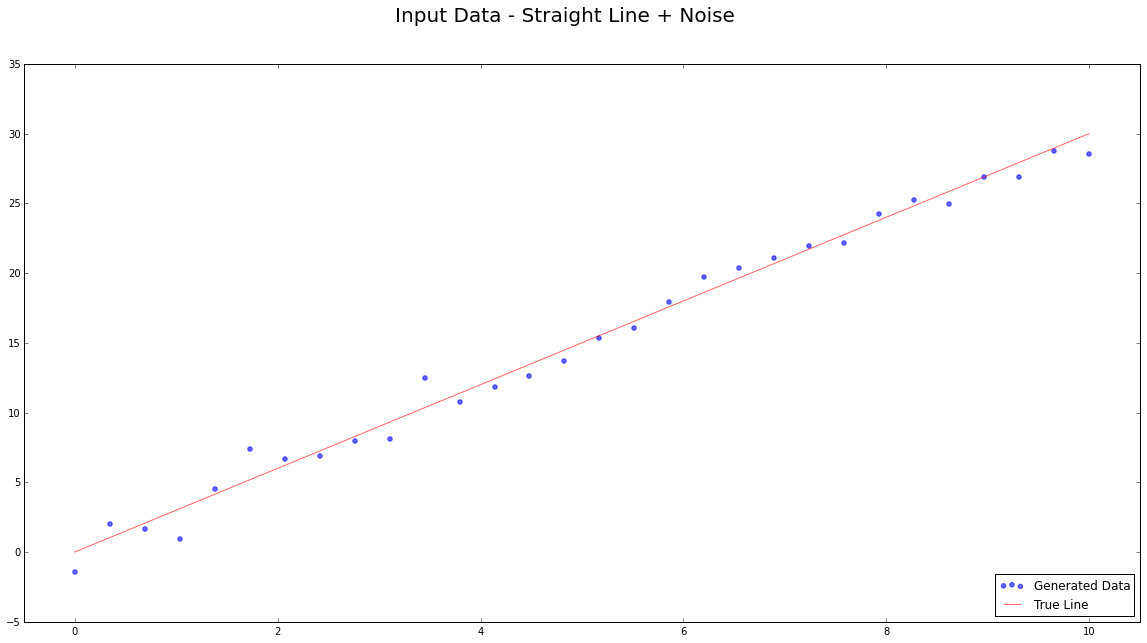

In [2]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('Input Data - Straight Line + Noise ', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
true_line, = pyplot.plot(x, 3.0*x, color='r', alpha=0.6, label='True Line')

#Add a legend
pyplot.legend(handles=[generated_data, true_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])

<h1>Linear Regression</h1>
<p>Discover the distribution above</p>

In [3]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()

lin_model.fit(x, y)

print 'y = ', lin_model.coef_[0][0], 'x +', lin_model.intercept_[0]

print '\n'

error = 0.5*np.sum((lin_model.predict(x)-y)**2)
print 'error =', error

y =  2.97665200539 x + -0.0116829615081


error = 13.8309935907


(array([-0.5]), array([ 10.5]))

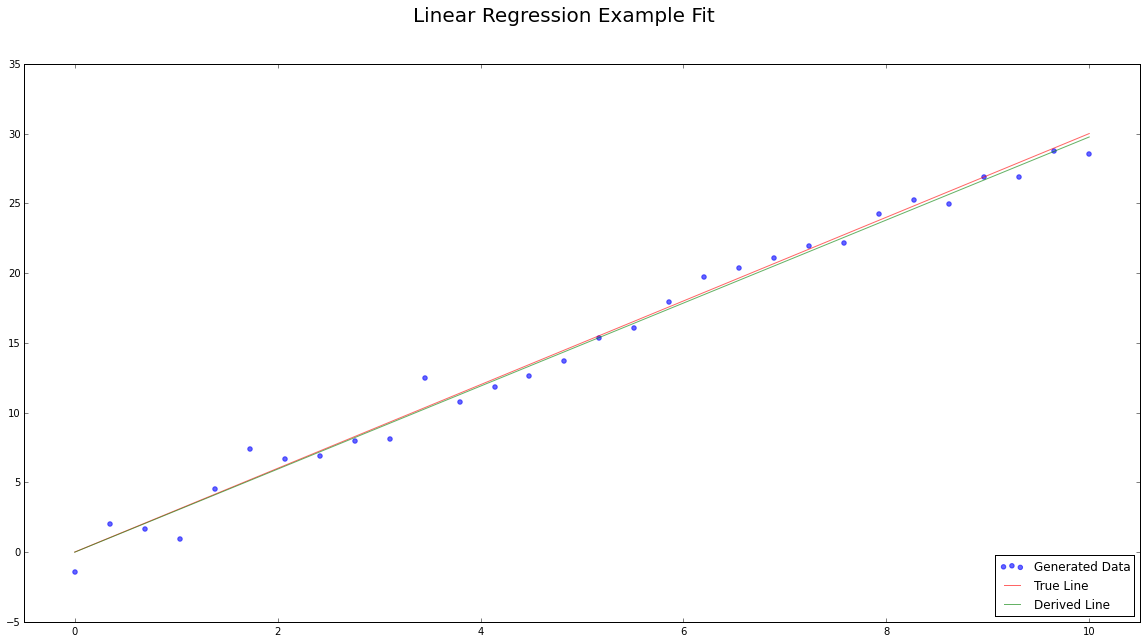

In [4]:
import matplotlib.pyplot as pyplot
%matplotlib inline

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('Linear Regression Example Fit ', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
true_line, = pyplot.plot(x, 3.0*x, color='r', alpha=0.6, label='True Line')

#Plot the line from which the data is taken
derived_line, = pyplot.plot(x, lin_model.predict(x), color='g', alpha=0.6, label='Derived Line')

#Add a legend
pyplot.legend(handles=[generated_data, true_line, derived_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])

<h1>Minimise That Error Function</h1>

error = 1.19780602309


/Users/simonsmith/Documents/time_date/venv_concepteast/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


(-5.0, 35.0)

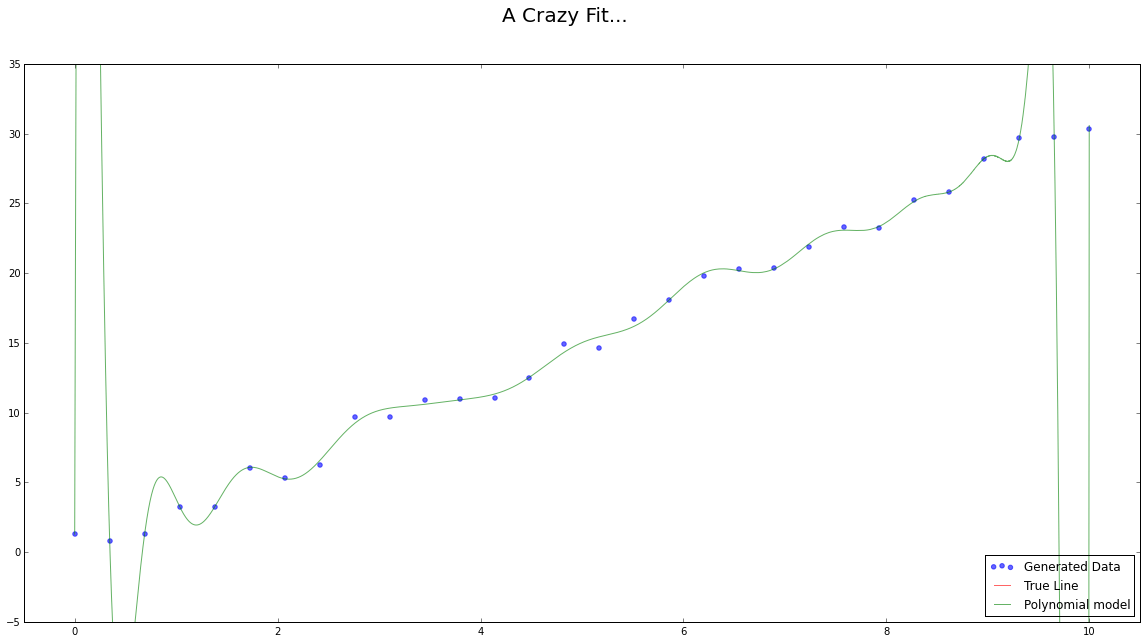

In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

#Fit an order NUM_POINTS-1 polynomial (i.e. a*x^49 + b*x^48 + ...)
fit= np.polyfit(x.reshape(NUM_POINTS),y.reshape(NUM_POINTS), NUM_POINTS-1, rcond=0.0)
model = np.poly1d(fit)
x_plot = np.linspace(0,10, 10000).reshape((10000,1))
y_plot = model(x_plot)

#Create a big graph
fig = pyplot.figure(figsize=(20, 10), dpi=100)

# Add a title and set the x limit
fig.suptitle('A Crazy Fit...', fontsize=20)

#Plot the generated data
generated_data = pyplot.scatter(x, y, color='b', alpha=0.6, label='Generated Data')

#Plot the line from which the data is taken
derived_line, = pyplot.plot(x_plot, y_plot, color='g', alpha=0.6, label='Polynomial model')

#Add a legend
pyplot.legend(handles=[generated_data, true_line, derived_line], loc=4)

#Remove some of the excess space on the graph
pyplot.xlim([x[0]-0.5,x[-1]+0.5])
pyplot.ylim([-5.0, 35.0])

In [71]:
error = 0.5*np.sum((model(x)-y)**2)
print 'error =', error

error = 1.19780602309


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<img src="one_does_not_simply.jpg"/>

<h1>Sample Some More Data</h1>

In [73]:
# Evenly spaced x positions
x2 = np.linspace(0.5,9.0, NUM_POINTS).reshape((NUM_POINTS, 1))
print 'x2 =', x2

# Gausian/normal noise
noise2 = np.random.randn(NUM_POINTS).reshape((NUM_POINTS, 1))

# y = 3x + noise
y2 = 3.0*x2 + noise2

x2 = [[ 0.5       ]
 [ 0.79310345]
 [ 1.0862069 ]
 [ 1.37931034]
 [ 1.67241379]
 [ 1.96551724]
 [ 2.25862069]
 [ 2.55172414]
 [ 2.84482759]
 [ 3.13793103]
 [ 3.43103448]
 [ 3.72413793]
 [ 4.01724138]
 [ 4.31034483]
 [ 4.60344828]
 [ 4.89655172]
 [ 5.18965517]
 [ 5.48275862]
 [ 5.77586207]
 [ 6.06896552]
 [ 6.36206897]
 [ 6.65517241]
 [ 6.94827586]
 [ 7.24137931]
 [ 7.53448276]
 [ 7.82758621]
 [ 8.12068966]
 [ 8.4137931 ]
 [ 8.70689655]
 [ 9.        ]]


In [74]:
polynomial_error = 0.5*np.sum((model(x2)-y2)**2)
print 'polynomial_error =', polynomial_error

polynomial_error = 114.756231626


In [78]:
linear_error = 0.5*np.sum((lin_model.predict(x2)-y2)**2)
print 'linear_error =', linear_error

linear_error = 15.9285460977
